In [2]:
import subprocess
import os
import shutil
from pathlib import Path
import sys
from processing import utils as p_utils
import contextlib
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

root = Path.cwd().parent
library = root.parent / "reward-surfaces"
stash = root / "stash"
scripts = library / "scripts"

run_suffix = "_test"
env_name = "CartPole-v1"
agent_name = "SB3_ON"
run_id = "cartpole" + run_suffix

In [16]:
# Train RL agent
script_name = "train_agent"
args = {
    "save_dir": stash / run_id / "agent",
    "agent_name": agent_name,
    "env": env_name,
    "device": device,
    "hyperparameters": '{"ALGO": "PPO", "n_timesteps":50000}',
}
kwargs = {
    "--save_freq": str(10000),
}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py
False
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 256),
             ('clip_range', 'lin_0.2'),
             ('ent_coef', 0.0),
             ('gae_lambda', 0.8),
             ('gamma', 0.98),
             ('learning_rate', 'lin_0.001'),
             ('n_envs', 8),
             ('n_epochs', 20),
             ('n_steps', 32),
             ('n_timesteps', 50000),
             ('policy', 'MlpPolicy')])
Using 8 environments
cpu
Log path: /home/mattis/git/sem5/reward_landscapes/stash/cartpole_test/agent/ppo/CartPole-v1_5
saved checkpoint 0010000
Eval num_timesteps=10000, episode_reward=126.30 +/- 28.32
Episode length: 126.30 +/- 28.32
New best mean reward!
saved checkpoint 0020000
Eval num_timesteps=20000, episode_reward=269.36 +/- 48.96
Episode length: 269.36 +/- 48.96
New best mean reward!
saved checkpoint 

In [3]:
# Define gradient eval jobs
script_name = "generate_eval_jobs"
args = {
    "train_dir": stash / run_id / "agent",
    "out_dir": stash / run_id / "gradient",
}
kwargs = {
    "--batch-grad": None,
    "--num-steps": str(10000),
    # "--num-episodes":str(10000000000000),
    "--device": device,
}
shutil.rmtree(stash / run_id / "gradient")
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

# Evaluate gradient direction
script_name = "run_jobs_multiproc"
args = {
    "job_dir": stash / run_id / "gradient" / "jobs.sh",
}
kwargs = {"--num-cpus": str(7)}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py
['0010000', '0020000', '0030000', '0040000', '0050000']


  0%|          | 0/5 [00:00<?, ?it/s]

/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py

/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py
/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py
/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py
Default hyperparameters for environment (ones being tuned will be overridden):
OrderedDict([('batch_size', 256),
             ('clip_range', 'lin_0.2'),
             ('ent_coef', 0.0),
             ('gae_lambda', 0.8),
             ('gamma', 0.98),
             ('learning_rate', 'lin_0.001'),
             ('n_envs', 8),
             ('n_epochs', 20),
             ('n_steps', 32),
  

/home/mattis/git/sem5/reward-surfaces/reward_surfaces/algorithms/eval_policy_hess.py:281: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  torch.squeeze(torch.tensor(test_states[0][0:2], device=device), dim=1),


computing batch grad mag


/home/mattis/git/sem5/reward-surfaces/reward_surfaces/algorithms/eval_policy_hess.py:281: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  torch.squeeze(torch.tensor(test_states[0][0:2], device=device), dim=1),


computing batch grad mag


/home/mattis/git/sem5/reward-surfaces/reward_surfaces/algorithms/eval_policy_hess.py:281: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  torch.squeeze(torch.tensor(test_states[0][0:2], device=device), dim=1),
/home/mattis/git/sem5/reward-surfaces/reward_surfaces/algorithms/eval_policy_hess.py:281: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  torch.squeeze(torch.tensor(test_states[0][0:2], device=device), dim=1),
/home/mattis/git/sem5/reward-surfaces/reward_surfaces/algorithms/eval_policy_hess.py:281: UserWarning: Creating a tensor from a list of numpy.ndarrays is ex

computing batch grad mag
computing batch grad mag
computing batch grad mag
Number of episodes: 83
dumping results
Number of episodes: 20
dumping results
Number of episodes: 20
dumping results
Number of episodes: 39
dumping results
Number of episodes: 21
dumping results


 80%|████████  | 4/5 [00:51<00:12, 12.91s/it]


In [3]:
# Define line jobs
script_name = "eval_line_segment"
args = {
    "agent_dir": stash / run_id / "agent",
    "in_dir": stash / run_id / "gradient",
    "out_dir": stash / run_id / "line",
}
kwargs = {
    "--num-episodes":str(100),
    "--length":str(20),
    "--max-magnitude":str(0.4),
    "--device":device,
    "--scale-dir":None
}
shutil.rmtree(stash / run_id / "line")
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

# Evaluate plane directions
script_name = "run_jobs_multiproc"
args = {
    "job_dir": stash / run_id / "line" / "jobs.sh"
}
kwargs = {"--num-cpus": str(7)}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

# Copy surface results to csv
script_name = "job_results_to_csv"
args = {
    "out_dir": stash / run_id / "line",
}
kwargs = {}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

0it [00:00, ?it/s]


/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py


Traceback (most recent call last):
  File "/home/mattis/.pyenv/versions/3.8.20/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/mattis/.pyenv/versions/3.8.20/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/mattis/git/sem5/reward-surfaces/scripts/job_results_to_csv.py", line 15, in <module>
    main()
  File "/home/mattis/git/sem5/reward-surfaces/scripts/job_results_to_csv.py", line 11, in main
    job_results_to_csv(args.job_dir)
  File "/home/mattis/git/sem5/reward-surfaces/reward_surfaces/utils/job_results_to_csv.py", line 12, in job_results_to_csv
    keys = list(json.load(open(results_dir / results_fnames[0])).keys())
IndexError: list index out of range


In [ ]:
# Plot gradient lines
script_name = "plot_eval_line_segement"
args = {
    "in_dir": stash / run_id / "line" / "results.csv",
}
kwargs = {
    "--outname": "cartpole__lines.png",
}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

In [ ]:
# Define plane jobs
script_name = "generate_plane_jobs"
args = {
    "agent_dir": stash / run_id / "agent" / "best",
    "out_dir": stash / run_id / "surface",
}
kwargs = {
    "--grid-size": str(7), # str(31)
    "--magnitude": str(1.0),
    "--num-steps": str(50000), # str(200000)
    "--device": device
}
shutil.rmtree(stash / run_id / "surface")
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

# Evaluate plane directions
script_name = "run_jobs_multiproc"
args = {
    "job_dir": stash / run_id / "surface" / "jobs.sh",
}
kwargs = {"--num-cpus": str(6)}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

# Copy surface results to csv
script_name = "job_results_to_csv"
args = {
    "out_dir": stash / run_id / "surface",
}
kwargs = {}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)

In [29]:
import matplotlib
# Plot reward surface
script_name = "plot_plane"
args = {
    "in_dir": stash / run_id / "surface" / "results.csv",
}
kwargs = {
    "--outname": stash / run_id / run_id,
    "--env_name": "Cartpole" # "CartPole-v1",
    # "--key": "episode_rewards"
    # "--type": "mesh", # ["all", "mesh", "vtp", "heat", "contour",  "contourf"]
}
p_utils.execute(name=script_name, args=args, kwargs=kwargs, cwd=library)
print(matplotlib.__version__)

/home/mattis/.local/share/virtualenvs/reward_landscapes-JbenRfY6/lib/python3.8/site-packages/stable_baselines3/__init__.py
3.7.5


[[2.69897    2.69897    2.69897    2.69897    2.69897    2.69897
  2.69897   ]
 [2.69727251 2.69897    2.69897    2.69897    2.69897    2.69897
  2.69897   ]
 [2.69897    2.69897    2.69897    2.69897    2.69897    2.69897
  2.69897   ]
 [2.69897    2.69897    2.69897    2.69897    2.69897    2.69897
  2.69897   ]
 [2.69227654 2.69897    2.69897    2.69897    2.69897    2.69897
  2.69897   ]
 [2.69382175 2.6958976  2.69897    2.69897    2.69897    2.69897
  2.69781609]
 [2.6664053  2.67120746 2.68800489 2.69897    2.69897    2.69897
  2.64760797]]


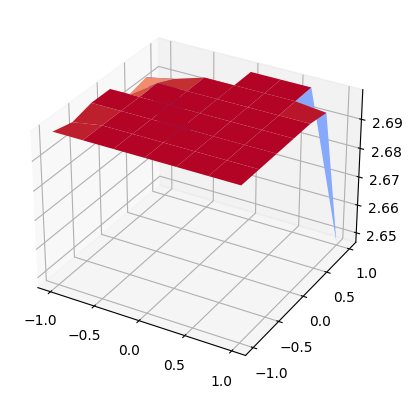

In [39]:
import pandas as pd
from reward_surfaces import plotting
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import plotly.graph_objects as go
import pickle
# plotting.plot_plane()
data = pd.read_csv(stash / run_id / "surface" / "results.csv")
# data
x,y,z = data["dim0"], data["dim1"], data["episode_rewards"]
n = np.floor(np.sqrt(len(x))).astype(int)

# X = np.reshape(x[:n**2], (n,n))
# Y = np.reshape(y[:n**2], (n,n))
# Z = np.reshape(z[:n**2], (n,n))
X = pickle.load(open("/home/mattis/git/sem5/reward_landscapes/test_X.pkl", "rb"))
Y = pickle.load(open("/home/mattis/git/sem5/reward_landscapes/test_Y.pkl", "rb"))
Z = pickle.load(open("/home/mattis/git/sem5/reward_landscapes/test_Z.pkl", "rb"))
print(Z)
# fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
# # fig.show()
# fig.show(figsize=(4,4))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
